In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point


### Create master state DataFrame with: 
Median income, EV registrations per capita, total population, and geographic coordinates for mapping

In [4]:
# census data by region
# https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
us = pd.read_excel('median_income_region.xlsx', header=(7,8))
northeast = pd.read_excel('median_income_region.xlsx', 'Northeast', header=(1,2))
midwest = pd.read_excel('median_income_region.xlsx', 'Midwest', header=(1,2))
south = pd.read_excel('median_income_region.xlsx', 'South', header=(1,2))
west = pd.read_excel('median_income_region.xlsx', 'West', header=(1,2))

In [5]:
# pull 2020 median income by region into new list
median_2020 = []

median_2020.append(us['Median income']['2020\ndollars'][0])
median_2020.append(northeast['Median income']['2020\ndollars'][0])
median_2020.append(midwest['Median income']['2020\ndollars'][0])
median_2020.append(south['Median income']['2020\ndollars'][0])
median_2020.append(west['Median income']['2020\ndollars'][0])

median_2020

[67521, 75211, 66968, 61243, 74951]

In [6]:
# new df with region and 2020 median income data
median_income_region = pd.DataFrame()

regions = ['United States', 'Northeast', 'Midwest', 'South', 'West']

median_income_region['Regions'] = regions
median_income_region['Median Income 2020 (2020 Dollars)'] = median_2020

median_income_region

,Regions,Median Income 2020 (2020 Dollars)
0,United States,67521
1,Northeast,75211
2,Midwest,66968
3,South,61243
4,West,74951


<function matplotlib.pyplot.show(close=None, block=None)>

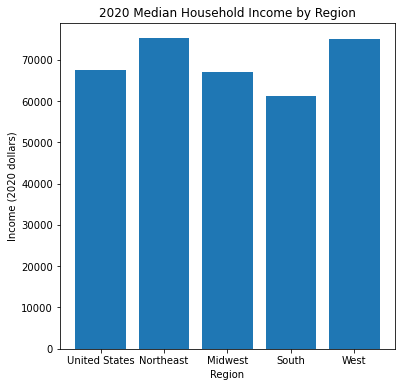

In [7]:
plt.figure(figsize=(6, 6))
plt.bar(regions, median_2020)
plt.title('2020 Median Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Income (2020 dollars)')
plt.show

In [33]:
# census data by state
# https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

state_median = pd.read_excel('median_income_state.xlsx', header=(62,63))

state_median.head()

State          2020                         2019  \
  Unnamed: 0_level_1 Median income Standard error Median income   
0      United States         67521            475         69560   
1            Alabama         54393           2587         56901   
2             Alaska         74476           3570         79373   
3            Arizona         66628           3534         71556   
4           Arkansas         50540           1992         55220   

                          2018                    2017 (40)                 \
  Standard error Median income Standard error Median income Standard error   
0            557         65127            433         64557            340   
1           2544         51475           2498         53711           1155   
2           6769         70853           3495         82351           3926   
3           3433         64203           2362         63041           2839   
4           2414         51316           2173         52535           2630   

           2017  ...          1988                    1987 (21)  \
  Median income  ... Median income Standard error Median income   
0         64806  ...         57433            293         56964   
1         53973  ...         42082           1924         43134   
2         76273  ...         69833           2496         72640   
3         64545  ...         55767           1778         58467   
4         51561  ...         42554           1489         41152   

                          1986                    1985 (20)                 \
  Standard error Median income Standard error Median income Standard error   
0            278         56291            292         54334            294   
1           2507         43257           2001         42176           1748   
2           3272         70895           2299         80017           2505   
3           1950         57655           1623         54930           1712   
4           2203         42348           1730         40147           1758   

      1984 (19)                 
  Median income Standard error  
0         53337            243  
1         41190           1440  
2         76992           3505  
3         50981           1449  
4         37297           1780  

[5 rows x 79 columns]

In [9]:
# clean headers and remove duplicate years
headers = []
drop = []

for year in range(1984, 2021):
    headers.append(year)
    
for header in state_median:
    if type(header[0]) == str and header[0] != 'State':
        new_header = int(header[0][:4])
        
        if new_header in headers:
            drop.append(header)
            state_median.drop([header], axis=1, inplace=True)
        else:
            state_median.rename(columns={header[0] : new_header}, inplace=True)

In [10]:
state_median.head()

State          2020                         2019  \
  Unnamed: 0_level_1 Median income Standard error Median income   
0      United States         67521            475         69560   
1            Alabama         54393           2587         56901   
2             Alaska         74476           3570         79373   
3            Arizona         66628           3534         71556   
4           Arkansas         50540           1992         55220   

                          2018                         2017                 \
  Standard error Median income Standard error Median income Standard error   
0            557         65127            433         64806            354   
1           2544         51475           2498         53973            892   
2           6769         70853           3495         76273           2871   
3           3433         64203           2362         64545           2790   
4           2414         51316           2173         51561           2790   

           2016  ...          1991                         1990  \
  Median income  ... Median income Standard error Median income   
0         63683  ...         55992            268         57677   
1         50936  ...         45250           1985         44991   
2         81680  ...         75482           3386         75697   
3         61592  ...         57128           1667         56292   
4         49518  ...         43556           1455         43891   

                          1989                         1988                 \
  Standard error Median income Standard error Median income Standard error   
0            295         58425            321         57433            293   
1           1997         43019           2163         42082           1924   
2           3134         72776           2785         69833           2496   
3           2198         57710           2446         55767           1778   
4           1890         43321           1849         42554           1489   

           1986                 
  Median income Standard error  
0         56291            292  
1         43257           2001  
2         70895           2299  
3         57655           1623  
4         42348           1730  

[5 rows x 49 columns]

In [11]:
# new df with states and 2020 median income data
states = state_median['State']['Unnamed: 0_level_1']
median2020 = state_median[2020]['Median income']
frame = { 'State': states, '2020 Median Income': median2020 }

In [12]:
state_median2020 = pd.DataFrame(frame)
state_median2020.head()

,State,2020 Median Income
0,United States,67521
1,Alabama,54393
2,Alaska,74476
3,Arizona,66628
4,Arkansas,50540


In [13]:
# data on EV registrations by state
# https://afdc.energy.gov/data/10962
evreg_state = pd.read_excel('10962-ev-registration-counts-by-state_6-11-21.xlsx', 
                            header=(2), usecols=['State', 'Registration Count'])
evreg_state.rename(columns={"Registration Count": "EV Registration Count"}, inplace=True)

evreg_state.head()

,State,EV Registration Count
0,Alabama,2890
1,Alaska,940
2,Arizona,28770
3,Arkansas,1330
4,California,425300


<AxesSubplot:title={'center':'Heat Map of Median Income (USA)'}>

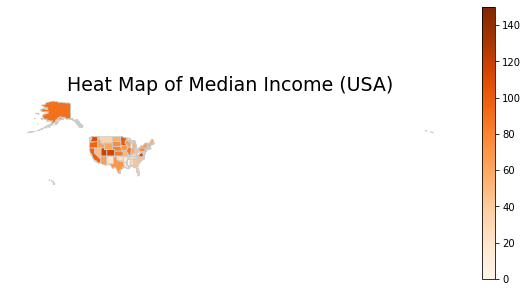

In [54]:
state_info = pd.merge(state_median2020, evreg_state, on='State') # merge 2020 income and EV registration dfs
states = geopandas.read_file('shapes/shapefile.shx')
states = states[['NAME','STUSPS','geometry']]
states = states.rename(columns={'NAME':'State'})

state_geo = pd.merge(states,state_info, on='State')

#print(state_geo.head())
state_info.head()

fig, ax = plt.subplots(1, figsize=(10, 5))
ax.axis('off')
ax.set_title('Heat Map of Median Income (USA)', fontdict={'fontsize': '19', 'fontweight' : '2'})

color = 'Oranges'
vmin, vmax = 0, 150
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=10)

state_geo.plot('2020 Median Income', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(10,10))


In [15]:
# census data on state populations in 2019 (most recent year)
# https://data.census.gov/cedsci/table?q=Total%20Population&g=0100000US%240400000&tid=ACSDP1Y2019.DP05
state_pop = pd.read_excel('ACSDP1Y2019.DP05-2021-12-05T182017.xlsx', 'Data')

# remove repeat instances of Total population LI by taking only top 5 rows
state_pop = state_pop.head(5)
state_pop = state_pop.T # transpose data to match merged df
new_header = state_pop.iloc[0] # take first row to be new header
state_pop = state_pop[1:] # new data minus first row (new header)
state_pop.columns = new_header
state_pop.drop(['Label', 'SEX AND AGE', 'Male', 'Female'], axis=1, inplace=True) # drop all irrelevent data

state_pop.head()

Unnamed: 0,Total population
Alabama,"4,903,185"
Alaska,"731,545"
Arizona,"7,278,717"
Arkansas,"3,017,804"
California,"39,512,223"


In [16]:
state_pop.reset_index(inplace=True)
state_pop.rename(columns={"index": "State"}, inplace=True) # rename columns to match naming conventions
state_pop.head()

Unnamed: 0,State,Total population
0,Alabama,"4,903,185"
1,Alaska,"731,545"
2,Arizona,"7,278,717"
3,Arkansas,"3,017,804"
4,California,"39,512,223"


In [17]:
# remove columns, str to int
state_pop['Total population'] = state_pop['Total population'].str.replace(',', '').astype(int)

In [18]:
state_info = pd.merge(state_info, state_pop, on='State') # add population data to master state df
state_info.head()

,State,2020 Median Income,EV Registration Count,Total population
0,Alabama,54393,2890,4903185
1,Alaska,74476,940,731545
2,Arizona,66628,28770,7278717
3,Arkansas,50540,1330,3017804
4,California,77358,425300,39512223


In [19]:
# calculated field for EV registrations per capita to add context to numbers
state_info['EV Registations per 1000'] = state_info['EV Registration Count'] / state_info['Total population'] * 1000

In [20]:
# import state coordinates from tsv file
# https://www.census.gov/geographies/reference-files/2010/geo/state-area.html

state_coord_area = pd.read_csv('census_state_data.txt', sep='\t', names=['State', 'Square Miles', 'total Sq. Km.', 'land Sq. Mi.', 
                                  'land Sq. Km.', 'water Sq. Mi.', 'water Sq. Km.', 'inland Sq. Mi.',
                                  'inland Sq. Km.', 'coastal Sq. Mi.', 'coastal Sq. Km.', 'gl Sq. Mi.', 
                                  'gl Sq. Km.', 'territorial Sq. Mi.', 'territorial Sq. Km.', 'Latitude', 'Longitude'])

state_coord_area.head()

,State,Square Miles,total Sq. Km.,land Sq. Mi.,land Sq. Km.,water Sq. Mi.,water Sq. Km.,inland Sq. Mi.,inland Sq. Km.,coastal Sq. Mi.,coastal Sq. Km.,gl Sq. Mi.,gl Sq. Km.,territorial Sq. Mi.,territorial Sq. Km.,Latitude,Longitude
0,United States4,"3,796,742","9,833,517","3,531,905","9,147,593","264,837","685,924","85,647","221,824","42,337","109,652","60,094","155,643","76,759","198,806",NaN,NaN
1,Alabama,"52,420","135,767","50,645","131,171","1,775","4,597","1,058","2,740",517,"1,340",—,—,199,516,32.739632,-86.843459
2,Alaska,"665,384","1,723,337","570,641","1,477,953","94,743","245,383","19,304","49,997","26,119","67,647",—,—,"49,320","127,739",63.346191,-152.837068
3,Arizona,"113,990","295,234","113,594","294,207",396,"1,026",396,"1,026",—,—,—,—,—,—,34.209964,-111.602401
4,Arkansas,"53,179","137,732","52,035","134,771","1,143","2,961","1,143","2,961",—,—,—,—,—,—,34.895526,-92.444626


In [21]:
state_coord_area.drop(['total Sq. Km.', 'land Sq. Mi.','land Sq. Km.', 'water Sq. Mi.', 
                       'water Sq. Km.', 'inland Sq. Mi.', 'inland Sq. Km.', 'coastal Sq. Mi.', 
                       'coastal Sq. Km.', 'gl Sq. Mi.', 'gl Sq. Km.', 'territorial Sq. Mi.', 'territorial Sq. Km.'], 
                        axis=1, inplace=True)

In [22]:
state_info = pd.merge(state_info, state_coord_area, on='State') # add state coordinates to master state df

In [23]:
state_info['Square Miles'] = state_info['Square Miles'].str.replace(',', '').astype(int)

In [24]:
state_info['EV Registations per sq mile'] = state_info['EV Registration Count'] / state_info['Square Miles']

In [25]:
state_info.head(1)

,State,2020 Median Income,EV Registration Count,Total population,EV Registations per 1000,Square Miles,Latitude,Longitude,EV Registations per sq mile
0,Alabama,54393,2890,4903185,0.589413,52420,32.739632,-86.843459,0.055132


In [26]:
# for graphing, we need to drop Alaska, Hawaii, and DC
continental_state_info = state_info.drop([1,8,11])
continental_state_info

,State,2020 Median Income,EV Registration Count,Total population,EV Registations per 1000,Square Miles,Latitude,Longitude,EV Registations per sq mile
0,Alabama,54393,2890,4903185,0.589413,52420,32.739632,-86.843459,0.055132
2,Arizona,66628,28770,7278717,3.952620,113990,34.209964,-111.602401,0.252391
3,Arkansas,50540,1330,3017804,0.440718,53179,34.895526,-92.444626,0.025010
4,California,77358,425300,39512223,10.763758,163695,37.148573,-119.540651,2.598125
5,Colorado,82611,24670,5758736,4.283926,104094,38.993575,-105.507774,0.236997
6,Connecticut,79043,9040,3565287,2.535560,5543,41.579784,-72.746667,1.630886
7,Delaware,69132,1950,973764,2.002539,2489,38.993550,-75.447374,0.783447
9,Florida,57435,58160,21477737,2.707920,65758,28.457430,-82.409148,0.884455
10,Georgia,58952,23530,10617423,2.216169,59425,32.629384,-83.423213,0.395961
12,Idaho,66499,2300,1787065,1.287026,83569,44.302095,-114.595625,0.027522


<AxesSubplot:xlabel='State', ylabel='EV Registations per sq mile'>

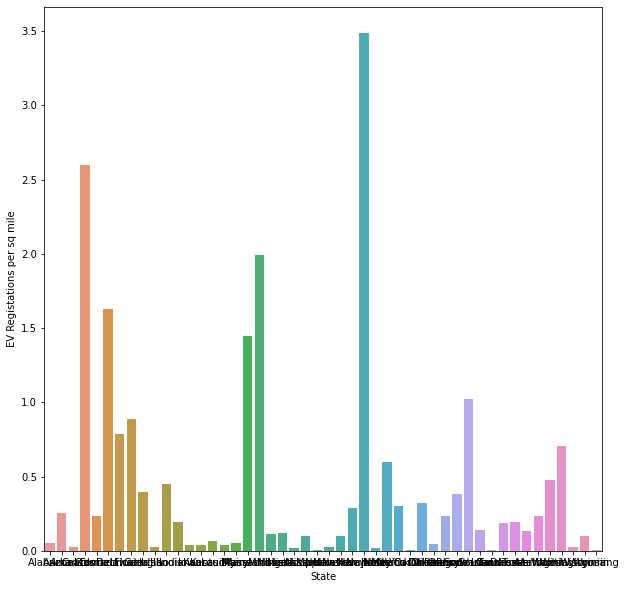

In [27]:
plt.figure(figsize=(10, 10))
sns.barplot(x='State', y='EV Registations per sq mile', data=continental_state_info)

In [28]:
# New function to map temperatures to a 2D Numpy array
# based on the GPS cordinates of the relevent station. 
# Numpy array is 150 x 100 to reflect range in Latitude
# and Longitude

def create_map(input_df, measure):
    
    x_dimen = 155
    y_dimen = 100

    empty_map = np.zeros((y_dimen,x_dimen), dtype = int)
    
    longitudes = []
    latitudes = []
    data = []

    for index, row in input_df.iterrows():
        longitudes.append(row['Longitude'])
        latitudes.append(row['Latitude'])
        data.append(row[measure])
        
    for i in range(len(data)):
        lon_percent = (longitudes[i]-(-125.0)) / (-65-(-125.0))
        lat_percent = (latitudes[i]-(50.0)) / (25.0-(50.0))

        x_cord = int(lon_percent * 150)
        y_cord = int(lat_percent * 100)
        
        # automatically make values <1 = 1 for graphing purposes
        if data[i] > 1:
            empty_map[y_cord][x_cord] = data[i]
        if data[i] < 1:
            empty_map[y_cord][x_cord] = 1
        
    return empty_map

In [29]:
def size_mapping(input_array):

    x_dimen = 155
    y_dimen = 100
    z_dimen = 3
    
    heat_map = np.zeros((y_dimen, x_dimen, z_dimen), dtype = int)
 
    white = [255, 255, 255]
    blue = [0, 0, 204]
    red = [204, 0, 0]
    
    x = 0
    for lat in input_array:
        y = 0
        for ev in lat:
            if ev == 0:
                heat_map[x][y] = white
            
            size = ev
            
            # if the value == 1 then color blue, otherwise color red
            if ev == 1:
                # THIS CODE DOES WORK - NEED TO FIX
                for i in range(-size,(size+1)):
                    for j in range(-size,(size+1)):
                        heat_map[x+i][y+j] = blue
    
            if ev != 0:
                if ev != 1:
                    for i in range(-size,(size+1)):
                        for j in range(-size,(size+1)):
                            heat_map[x+i][y+j] = red
                    
            y += 1
        x += 1
        
    return heat_map

In [30]:
def create_image(map_data):
    
    plt.figure(figsize = (12,12)) 
    plt.imshow(map_data, interpolation = "none")

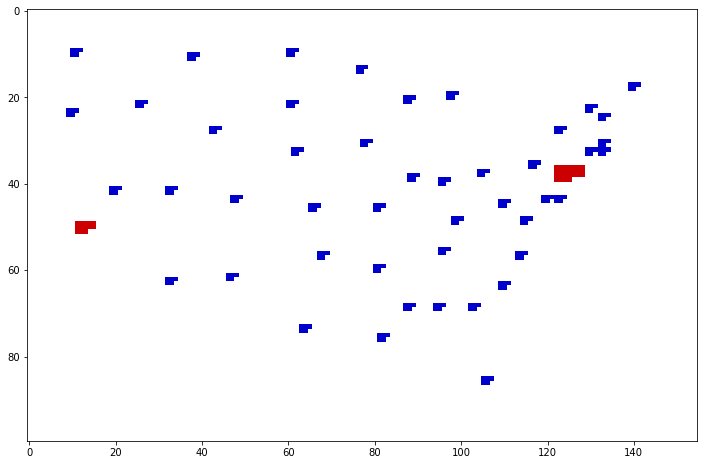

In [31]:
create_image(size_mapping(create_map(continental_state_info, 'EV Registations per sq mile')))

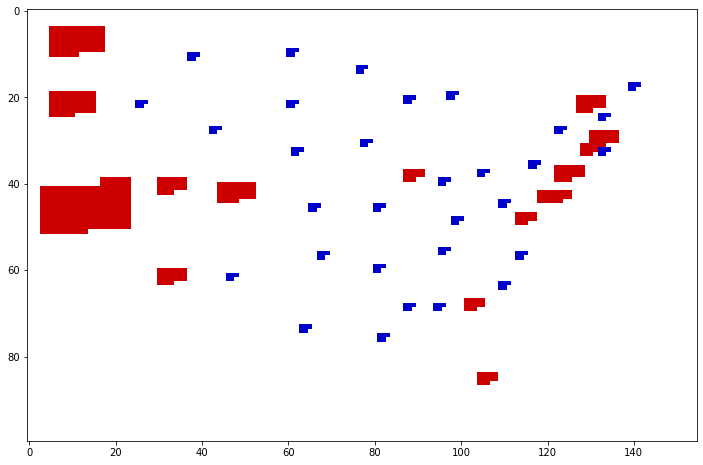

In [32]:
create_image(size_mapping(create_map(continental_state_info, 'EV Registations per 1000')))